## EXERCICE 11 : Régression logistique et explicabilité

Vous voila maintenant prêts à utiliser vos connaissances méthodologiques et techniques pour l'étude de nouveaux cas. Nous allons maintenant tenter de distinguer des *8* et des *9* manuscrits à partir d'un modèle de régression logisique. Une fois le modèle appris et validé, nous expliquerons comment les décision sont prises en représentant les poids attribués aux différents pixels. 


(200, 784)
(200, 1)
8.53
(1800, 784)
(1800, 1)
8.51


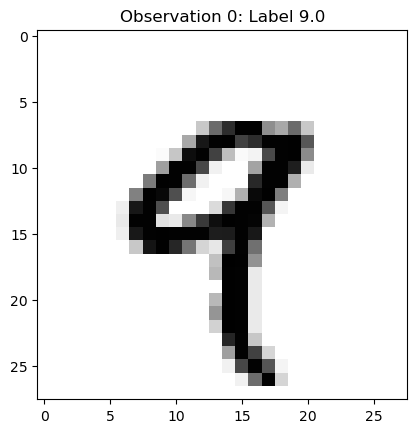

In [4]:

import numpy as np # to handle matrix and data operation
import matplotlib.pyplot as plt   #image visualisation


def ShowMNISTObservation(X_data,y_data,obsNb=0):
  plt.clf()
  plt.imshow(X_data[obsNb,:].reshape((28,28)),cmap='binary')
  plt.title('Observation '+str(obsNb)+': Label '+str((y_data[obsNb,0])))
  plt.show()


    
data=np.genfromtxt('data/mnist_8_9.csv',delimiter=',')

n_tot=data.shape[0]
p=data.shape[1]

y_train=data[:200,0].reshape(-1,1)
X_train=data[:200,1:]

y_test=data[200:,0].reshape(-1,1)
X_test=data[200:,1:]


print(X_train.shape)
print(y_train.shape)
print(np.mean(y_train))
print(X_test.shape)
print(y_test.shape)
print(np.mean(y_test))

ShowMNISTObservation(X_train,y_train,obsNb=0)


In [3]:
data

array([[9., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.]])

### <span style="color:blue">QUESTIONS</span> 
    
#### <span style="color:blue">QUESTION 1</span> 
    
Bien comprendre la structuration des données dans l'exemple ci-dessus. Utilisez alors la classe de scikit-learn dédiée à la régression logistique pour apprendre à distinguer les 8 manuscrits les 9 manuscrits.
    
On notera que :
- les algorithmes d'apprentissage automatique sont souvent pré-calibrés pour prendre en entrée des données centrées-réduites dans le cas de données *tableaux*, ou des valeurs entre 0 et 1 dans le cas des données *images*.
- Les labels des deux classes en sortie (i.e. dans Y) seront 0 ou 1.

#### <span style="color:blue">REPONSE 1 </span> 

    




In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Étape 1 : Normalisation des données (si vos pixels sont entre 0 et 255)
X_train = X_train / 255.0  # Normalisation entre 0 et 1
X_test = X_test / 255.0

# Étape 2 : Binarisation des labels (Y contient 8 ou 9, on les remplace par 0 ou 1)
y_train = (y_train == 9).astype(int)  # Si label est 9, devient 1, sinon 0
y_test = (y_test == 9).astype(int)

# Étape 4 : Appliquer la régression logistique
model = LogisticRegression(max_iter=1000)  # max_iter pour s'assurer que l'algo converge

# Étape 5 : Entraîner le modèle
model.fit(X_train, y_train)

# Étape 6 : Prédire les labels sur l'ensemble de test
y_pred = model.predict(X_test)

# Étape 7 : Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.06%


/Users/astel/mambaforge/envs/py-latest/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



#### <span style="color:blue">QUESTION 2</span> 

Une fois les paramètres du classifieur appris, validez son efficacité. 
    
#### <span style="color:blue">REPONSE 2</span> 


In [ ]:
#...

    
#### <span style="color:blue">QUESTION 3</span> 

Visualisez les poids attribués à chaque pixel dans le classifieur pour expliquer quels pixels sont les plus influents dans la prise de décision.
    
#### <span style="color:blue">REPONSE 3</span> 


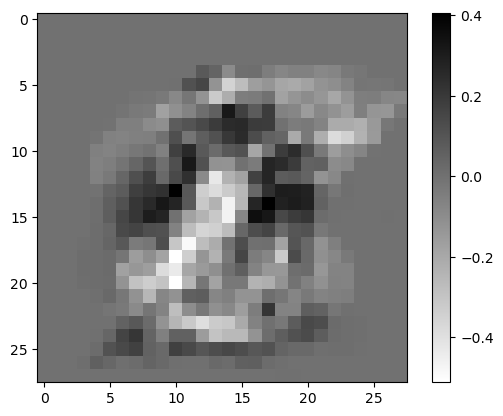

In [9]:
plt.clf()
plt.imshow((model.coef_).reshape(28,28), cmap='binary')
plt.colorbar()
plt.show()

In [7]:
model.coef_.shape

(1, 784)

#### <span style="color:blue">QUESTION 4</span> 

Régularisez le problème d'appentissage, de manière à utiliser par la suite moins de 10 pixels pour la prise de décision. Représentez alors ces pixels. La localisation de ces points automatiquement détectés, vous semble-t-elle avoir du sens ? La précision des prédiction est-elle beaucoup pénalisée ? 
    
#### <span style="color:blue">REPONSE 4</span> 


In [ ]:
#...